Combine two overlapping images into a single panoramic image. 
Display the original images and the final stitched panorama.

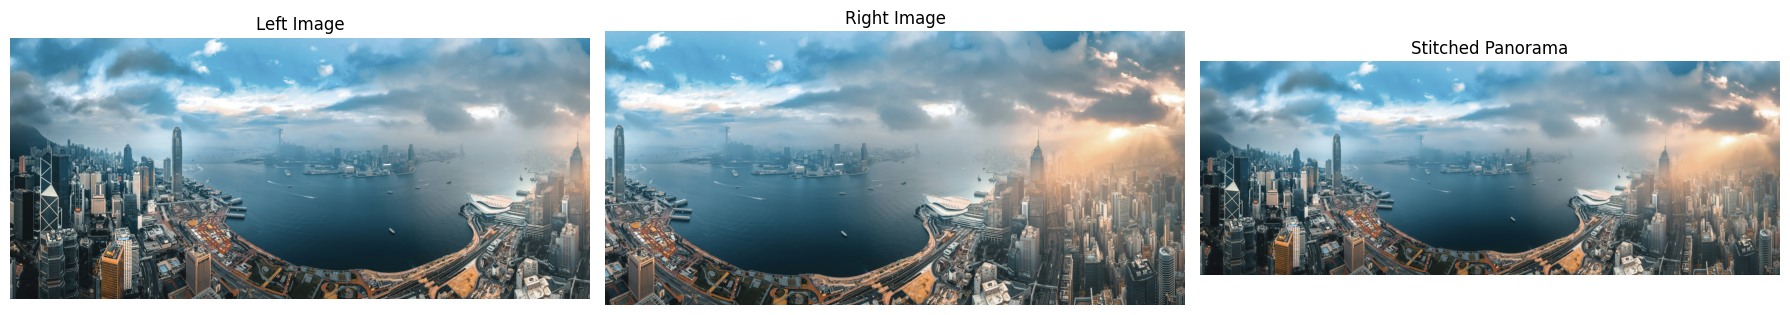

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load images
img_left = cv2.imread('left.jpg')
img_right = cv2.imread('right.jpg')

# Convert from BGR to RGB for display
img_left_rgb = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
img_right_rgb = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)

# Create stitcher object (OpenCV 4+)
stitcher = cv2.Stitcher_create() if int(cv2.__version__.split('.')[0]) >= 4 else cv2.createStitcher()

# Stitch images
status, panorama = stitcher.stitch([img_left, img_right])

# Display results
if status == cv2.Stitcher_OK:
    panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
    titles = ['Left Image', 'Right Image', 'Stitched Panorama']
    images = [img_left_rgb, img_right_rgb, panorama_rgb]

    plt.figure(figsize=(18, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"Stitching failed (code: {status})")
